# Import libraries

In [1]:
# Pandas is used for processing files such as csv, xlx and etc.
import pandas as pd
# Numpy is used for numerical calculations over arrays. It is a very fast library
import numpy as np
# Machine learning and Deep learning framework. It is tensorflow based with a nice User interface.
import keras
# Matplotlib is used plotting different graphs and 
from matplotlib import pyplot
# Math is used for mathematical computations
import math
# Sklearn is a machine learning framework with different preprocessing tools for data management
# MinMaxScaler is used for input data scaling in range [0, 1]
from sklearn.preprocessing import MinMaxScaler
# LabelEncoder is used for numerical implementation of names, like male and female would be 0 and 1 respectively
from sklearn.preprocessing import LabelEncoder
# train_test_split is used for splitting data into train and test data
from sklearn.model_selection import train_test_split
# Sequential is used for adding different neural network layers together
from keras.models import Sequential
# Dense is a all to all neural network model. See model types below
from keras.layers import Dense
# LSTM is a all to all neural network layer for time series data analysis. See model types below
from keras.layers import LSTM

Using TensorFlow backend.


Let's look at the winners' methods on kaggle competition:
* Random Forest
* Linear Regression
* K-nearest neighbours

## Random Forest
Random forest is a machine learning algorithm that uses decision trees to make decision for each state in the tree. It looks like this:
<img src="images/random_forest.png" width='300px' height='200px'>
Based on the data we have, we can see that for our model it would be more appropriate to have unlimited cases because we may have prices with bigger float number and a random forest would hence not be accurate enough for partly continuous random variables. Also for this method to be able to predict good enough results, the data must be from gaussian distribution.

## Linear Regression
Linear Regression is a machine learning algorithm that uses interpolation to make a surface that is close enough to desired outputs. 
<img src="images/linear_regression.png" width='300px' height='200px'>
This method is not as accurate enough as input and output values are not linearly dependent in most cases.

## K-nearest neighbours
K-nearest neighbours is also a machine learning algorithm. It is also called a 'lazy' algorithm, since it does not make a good generalization for the training data. It finds the minimum distance vector from input vector. The weakness in this method is that even there is just one outlier, in a sample from the training data, this model would not give a result even close to the correct result.
<img src="images/KNN.jpg" width='300px' height='200px'>

### All the above methods are very nice, but today as technology develops, new techniques for problem solving have been developed and let's see how the latest methods would solve this kind of task

# Dense layer (Fully Connected Layer):

A linear operation in which every input is connected to every output by a line is called dense layer. Every node is connected. These connections are called weights and there can be a lot of them in a dense layer!

<img src="images/dense1.png" width='300px' height='200px'>

More complicated example:
<img src="images/dense2.png" width='300px' height='200px'>


# Recurrent Neural Networks:

We as humans, do not learn every time from scratch, when new experiences occur. Memory is vital for our life. As we read a novel, we remember the previuos words to get the meaning of the sentence. When we learn mathematics we remember the table of multiplication. We don’t forget everything and start learning from scratch again. Our thoughts are persistent in time, so we can retrieve them after. Recurrent neural networks solve this problem in machine learning. They are networks with loops in them, allowing information to persist in time and retrieve after some training. The only problem with Recurrent Neural Networks is the vanishing gradient problem i.e. some information is missing in every iteration and if the loop is long enough the missing values become big enough. This type of network is very popular in todays natural language processing and time series analysis: 

##### "We’ll train RNNs to generate text character by character and ponder the question “how is that even possible?”

##### "This is the way to look back more into the past and be able to influence the future."

<img src="images/rnn1.png" width='300px' height='200px'>

If we divide it:
<img src="images/rnn2.png" width='300px' height='200px'>


# LSTM layers:

Long Short Term Memory networks are a special kind of Recurrent Neural Network, capable of solving the vanishing gradient problem. They were introduced by Hochreiter & Schmidhuber (1997), and were refined, reused and popularized by many researchers.

They work very well on a large variety of problems in Computer vision and natural language processing tasks, also in time series analysis. Because of this they are now widely used.

Long Short Term Memory networks are designed for backpropagation through time. This allows them to remember information for a large amount of time.

All recurrent neural networks represent chains in the essence. For a simple one it can be just tanh layer:

<img src="images/tanh.png" width='300px' height='200px'>

So if we unlock the chain it occures we have many tanh layers:

<img src="images/rnn3.png" width='300px' height='200px'>

##### Here x's stand for input in time and h's for output in time.

Long Short Term Memory (LSTM) networks as we mentioned previously are capable of handling vanishing gradient problems i.e. they can remember outcomes for a long time. They aren't just a simple RNNs. The way the information is kept in the memory is like the human brain: we add the information from the past with new experiences. In a Long Short Term Memory network we have three gates that include input, forget and output. These gates determine whether or not to let new input in, delete the information because it isn’t important or to let it impact the output at the current time step.

<img src="images/rnn4.png" width='300px' height='200px'>

#### As we have time series data we will use LSTM layer and add Dense layer to get it more accurate

See references below:

* http://colah.github.io/posts/2015-08-Understanding-LSTMs/
* https://keras.io/layers/core/
* https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/fc_layer.html

# Load data
Read data with pandas library and show the first 5 rows with head() method.
# features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week


In [2]:
# Read the features data from file
features = pd.read_csv('data/features.csv')
# Show the first 5 lines of the file
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# train.csv

This is the historical training data, which covers from 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales -  sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

In [3]:
# Read the train data from file
train = pd.read_csv('data/train.csv')
# Show the first 5 lines of the file
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

In [4]:
# Read the stores data from file
stores = pd.read_csv('data/stores.csv')
# Show the first 5 lines of the file
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# Preprocess data
Now we have to merge train.csv and features.csv to get the features for each store and date in one dataframe, beacause we want all the information for the neural network and want to use it in an easy way.

In [5]:
# Merge the train, features and store data together
train_data = pd.merge(pd.merge(train, features, how = 'left',
                               left_on = ['Store', 'Date'], right_on = ['Store', 'Date']), 
                      stores, left_on = ['Store'], right_on = ['Store'])
# Convert the date variable from a string to datetime. We had 2010-02-19 as string in dataframe and converted it to
# datetime object, so the computer knows it is a date not a word.
train_data['Date'] = pd.to_datetime(train_data['Date'])
# Removed columns that were either redundant, a mixture of string and ints or
# had too many NaNs. Because every time we are provided with data, it is not 100% perfect and there are alwasys some missing values
# which we call NaNs
train_data = train_data.drop(['IsHoliday_y', 'Type', 'MarkDown1', 
                             'MarkDown2', 'MarkDown3', 'MarkDown4',
                             'MarkDown5'], 1)

# Any NaNs or NaNs became the column median. If there aren't many Nans in a column then there are many methods that can be used to
# avoid them. We can fill the column with mode (more occuring value) or with the average value - median. Here we used median
# because in the column 'IsHoliday_x' if we fill it with mode value we will lose all holiday values
train_data = train_data.fillna(train_data.median())
train_data['IsHoliday_x'] = train_data['IsHoliday_x'].astype(int)

# To make it a time-series, we sorted the data by oldest data first. As we saw in the LSTM layer the inputs are 
# dependent on time and thus input values shoud be from oldest to newest sorted and inserted in such a way that after 1 april
# goes in input, the next value should be 2 april
train_data = train_data.sort_values('Date')
train_data = train_data.set_index(train_data['Date'])

# Removed the date variable as NN algorithm has no way of dealing with datetime variables. So date is not the input 
# for the model. We do not want to teach the model to predict with dates.
train_data = train_data.drop('Date',1)

train_data.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Size
Date,,,,,,,,,
2010-02-05,1,1,24924.50,0,42.31,2.572,211.096358,8.106,151315
2010-02-05,29,5,15552.08,0,24.36,2.788,131.527903,10.064,93638
2010-02-05,29,6,3200.22,0,24.36,2.788,131.527903,10.064,93638
2010-02-05,29,7,10820.05,0,24.36,2.788,131.527903,10.064,93638
2010-02-05,29,8,20055.64,0,24.36,2.788,131.527903,10.064,93638


# Convert pandas array dataframe to timeSeries dataframe

In [6]:
def timeseries_to_supervised(data, lag=1):
    """
    This function converts a pandas dataframe/Series/numpy array organized 
    by time into one that is suitable for a supervised learning problem.
    So we make #lag days to be the input for the model. For example: each time we input 10 days in the model
    Parameters
    ----------
    data: pandas DataFrame or pandas Series or numpy Array
        Time Series data
    lag: integer
        The amount of "time lag" we wish our model to have
        
    Returns
    -------
    df: pandas DataFrame
        TimeSeries dataframe that is suitable for supervised learning
    """
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

In [7]:
def scale_data(data):
    """
    ----------
    data: pandas DataFrame or pandas Series or numpy Array
        Time Series data

    Returns
    -------
    df: pandas DataFrame
        TimeSeries dataframe that is suitable for supervised learning
    """
    #Get values from dataframe    
    values = data.values
    # Convert all variables to floats
    values = values.astype('float32')
    # Normalize features in range [0,-1]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled = scaler.fit_transform(values)
    # Frame as Supervised Learning
    return timeseries_to_supervised(scaled, 0)

In [8]:
# Scale data
train_data = scale_data(train_data)
train_data.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.000000,0.042851,0.0,0.434149,0.050100,0.840500,0.405118,0.630267
1,0.636364,0.040816,0.029425,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
2,0.636364,0.051020,0.011731,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
3,0.636364,0.061224,0.022646,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
4,0.636364,0.071429,0.035876,0.0,0.258513,0.158317,0.054008,0.592774,0.318073


# Separate weekly sales from train data
In general we can not tell when the store sells so we do not want to include it in the training process

In [9]:
scaled_train = scale_data(train_data)
# Get weekly sales from dataframe
weekly_sales = scaled_train.iloc[:,2:3]
# Remove weekly salesfrom training data
train_data = train_data.drop([2],1)
train_data.head()

,0,1,3,4,5,6,7,8
0,0.000000,0.000000,0.0,0.434149,0.050100,0.840500,0.405118,0.630267
1,0.636364,0.040816,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
2,0.636364,0.051020,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
3,0.636364,0.061224,0.0,0.258513,0.158317,0.054008,0.592774,0.318073
4,0.636364,0.071429,0.0,0.258513,0.158317,0.054008,0.592774,0.318073


# Split data to train and test
We use sklearn library to spit data for training and testing 80% and 20% respectively.

In [10]:
train_x, test_x, train_y, test_y = train_test_split(train_data, weekly_sales, test_size=0.2, random_state=42)

# Add aditional dimenshion to train and test 
We use batches to input date in the model and for the process to have a fast computation. That is the reason for adding additional dimension and group batches together.

In [11]:
train_x = train_x.values.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.values.reshape((test_x.shape[0], 1, test_x.shape[1]))

# Train LSTM model
Now we create the model using keras:
We use Sequential as we want to build a complex model consisting of Dense and LSTM layers
Let's see what just a single LSTM layer and Dense layer gives us.

In [12]:
# Allows us to build multi-layer NNs
model = Sequential()
# Output dimension = 50 input = 1*8
model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences = False))
# Dense determines how many outputs come from our NN
model.add(Dense(1))
# Configures the model for training
# We are using mean absolute error loss and adam optimizer
# Optimizers are used to update weighs in the neural network. See link below: 
# https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f
model.compile(loss='mae', optimizer='adam')
# Trains the model for for 100 epoches with batch size of 64
history = model.fit(train_x, train_y, epochs=100, batch_size=512, 
                   validation_data=(test_x, test_y), verbose=2, shuffle=False)

Train on 337256 samples, validate on 84314 samples
Epoch 1/100
 - 5s - loss: 0.0184 - val_loss: 0.0173
Epoch 2/100
 - 3s - loss: 0.0168 - val_loss: 0.0168
Epoch 3/100
 - 3s - loss: 0.0167 - val_loss: 0.0167
Epoch 4/100
 - 3s - loss: 0.0167 - val_loss: 0.0167
Epoch 5/100
 - 4s - loss: 0.0166 - val_loss: 0.0166
Epoch 6/100
 - 3s - loss: 0.0166 - val_loss: 0.0166
Epoch 7/100
 - 3s - loss: 0.0166 - val_loss: 0.0166
Epoch 8/100
 - 3s - loss: 0.0166 - val_loss: 0.0166
Epoch 9/100
 - 3s - loss: 0.0165 - val_loss: 0.0165
Epoch 10/100
 - 3s - loss: 0.0164 - val_loss: 0.0163
Epoch 11/100
 - 3s - loss: 0.0162 - val_loss: 0.0162
Epoch 12/100
 - 3s - loss: 0.0161 - val_loss: 0.0161
Epoch 13/100
 - 3s - loss: 0.0160 - val_loss: 0.0161
Epoch 14/100
 - 3s - loss: 0.0160 - val_loss: 0.0162
Epoch 15/100
 - 3s - loss: 0.0160 - val_loss: 0.0161
Epoch 16/100
 - 3s - loss: 0.0160 - val_loss: 0.0161
Epoch 17/100
 - 3s - loss: 0.0160 - val_loss: 0.0160
Epoch 18/100
 - 3s - loss: 0.0159 - val_loss: 0.0160
Epoc

# Calculate the Weighted Mean Absolute error (WMAE)

<img src="images/WMAE.png" width='300px' height='200px'>
where

* n is the number of rows
* ŷ i is the predicted sales
* yi is the actual sales
* wi are weights. w = 5 if the week is a holiday week, 1 otherwise

In [51]:
sum_of_weights = 0
weighted_sum_of_errors = 0
# Let's iterator throw all test values and count the error
for input_element, output_element in zip(test_x, test_y.values):
    # This expression gives 1 if it is not holiday and 5 otherwise
    sum_of_weights += (4 * input_element[0][2] + 1)
    prediction = model.predict(np.array([test_x[0]]))[0][0]
    weighted_sum_of_errors += (4 * input_element[0][2] + 1)*abs(prediction - output_element[0])

weighted_mean_absolute_error =  weighted_sum_of_errors / sum_of_weights

In [52]:
weighted_mean_absolute_error

0.019690522834295496

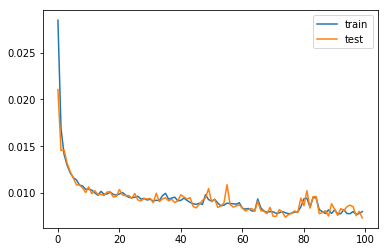

In [37]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## So the final loss with this network is 0.0149. Let's add some layers and see the results
# The WMAE for this network is 0.019690522834295496

In [33]:
model = Sequential()
# allows us to build multi-layer NNs
return_sequences = True 
model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences = True))
model.add(LSTM(25, return_sequences = True))
model.add(LSTM(12))
# Dense determines how many outputs come from our NN
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_x, train_y, epochs=100, batch_size=64, 
                   validation_data=(test_x, test_y), verbose=2, shuffle=False)

Train on 337256 samples, validate on 84314 samples
Epoch 1/100
 - 35s - loss: 0.0116 - val_loss: 0.0111
Epoch 2/100
 - 29s - loss: 0.0120 - val_loss: 0.0126
Epoch 3/100
 - 27s - loss: 0.0122 - val_loss: 0.0118
Epoch 4/100
 - 26s - loss: 0.0127 - val_loss: 0.0137
Epoch 5/100
 - 27s - loss: 0.0109 - val_loss: 0.0106
Epoch 6/100
 - 28s - loss: 0.0111 - val_loss: 0.0102
Epoch 7/100
 - 33s - loss: 0.0106 - val_loss: 0.0108
Epoch 8/100
 - 28s - loss: 0.0117 - val_loss: 0.0107
Epoch 9/100
 - 27s - loss: 0.0114 - val_loss: 0.0115
Epoch 10/100
 - 28s - loss: 0.0115 - val_loss: 0.0107
Epoch 11/100
 - 29s - loss: 0.0111 - val_loss: 0.0106
Epoch 12/100
 - 32s - loss: 0.0110 - val_loss: 0.0120
Epoch 13/100
 - 34s - loss: 0.0117 - val_loss: 0.0125
Epoch 14/100
 - 36s - loss: 0.0120 - val_loss: 0.0125
Epoch 15/100
 - 33s - loss: 0.0130 - val_loss: 0.0128
Epoch 16/100
 - 38s - loss: 0.0130 - val_loss: 0.0139
Epoch 17/100
 - 34s - loss: 0.0168 - val_loss: 0.0184
Epoch 18/100
 - 34s - loss: 0.0184 - val

# Plot training results

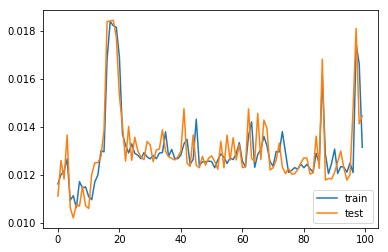

In [35]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# So the final loss with this network is 0.0144. 
So the occuracy have not changed as extended the network. That means the one LSTM plus one dense layer will be enough for the final model.